<a href="https://colab.research.google.com/github/noayarae/plot_templates/blob/main/pairs_plot_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Pairs plot**
This script contains several examples of pairs plot using R

#### **Diverse functions to plot pairs plot**
- functions to plot (pairs, with, plot(df))

In [27]:
# Numeric variables
df <- iris[1:4]

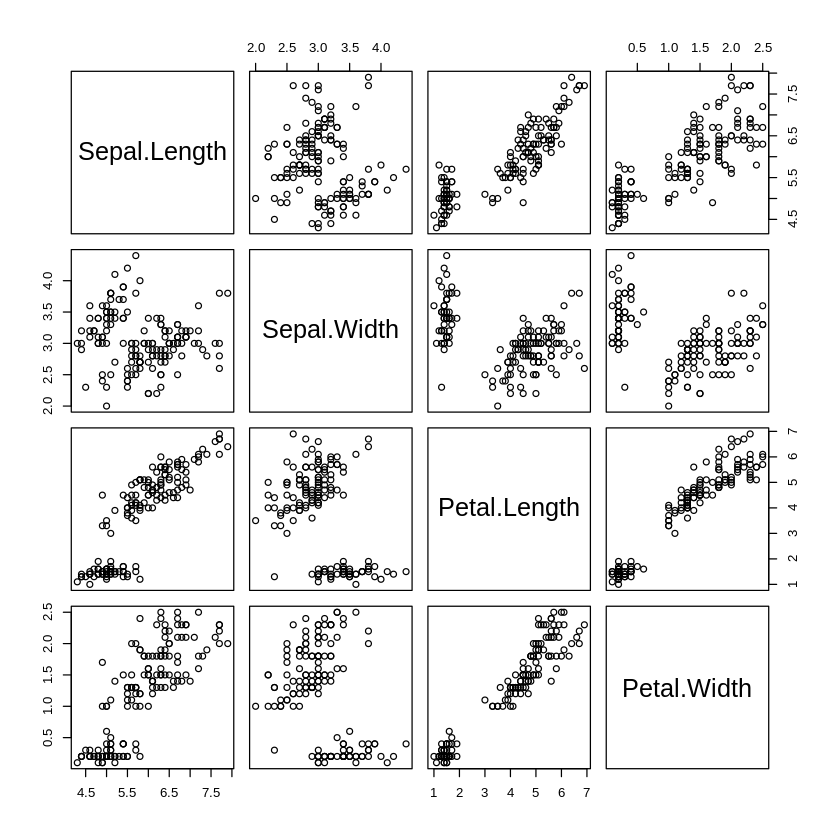

In [28]:
# method 1
pairs(df)

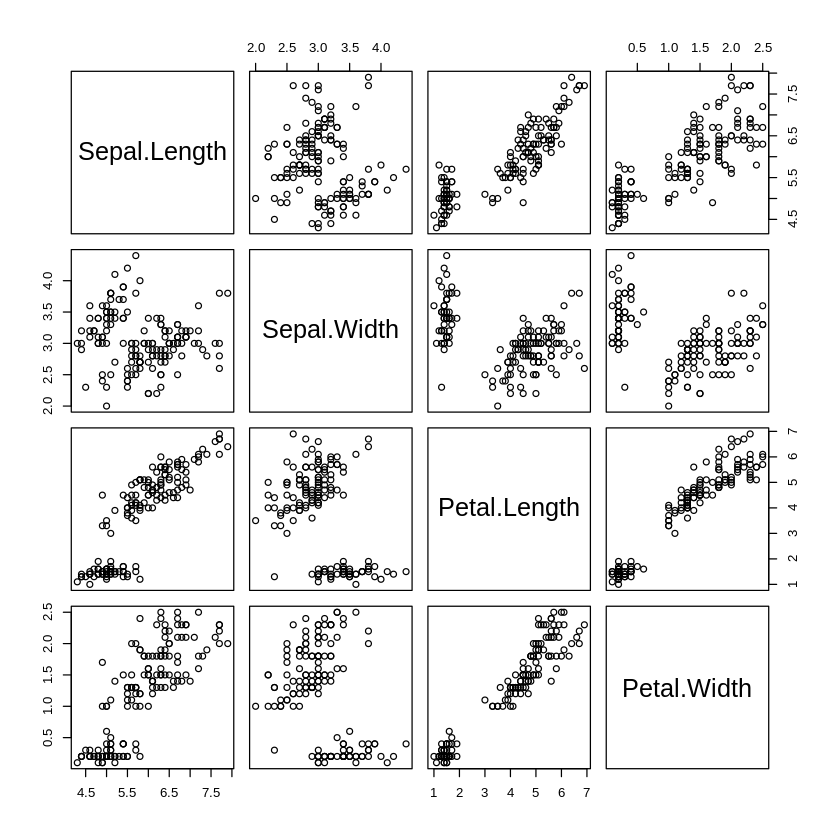

In [29]:
# Method 2. Equivalent to:
pairs(~ Sepal.Length + Sepal.Width +
        Petal.Length + Petal.Width, data = df)

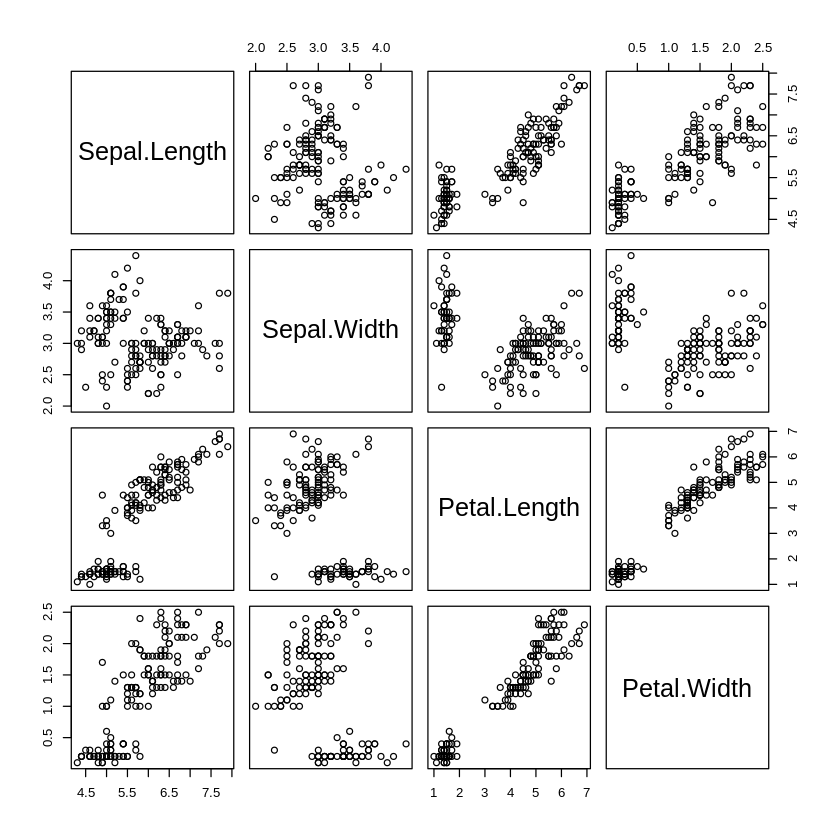

In [30]:
# Method 3. Equivalent to:
with(df, pairs(~ Sepal.Length + Sepal.Width +
                 Petal.Length + Petal.Width))

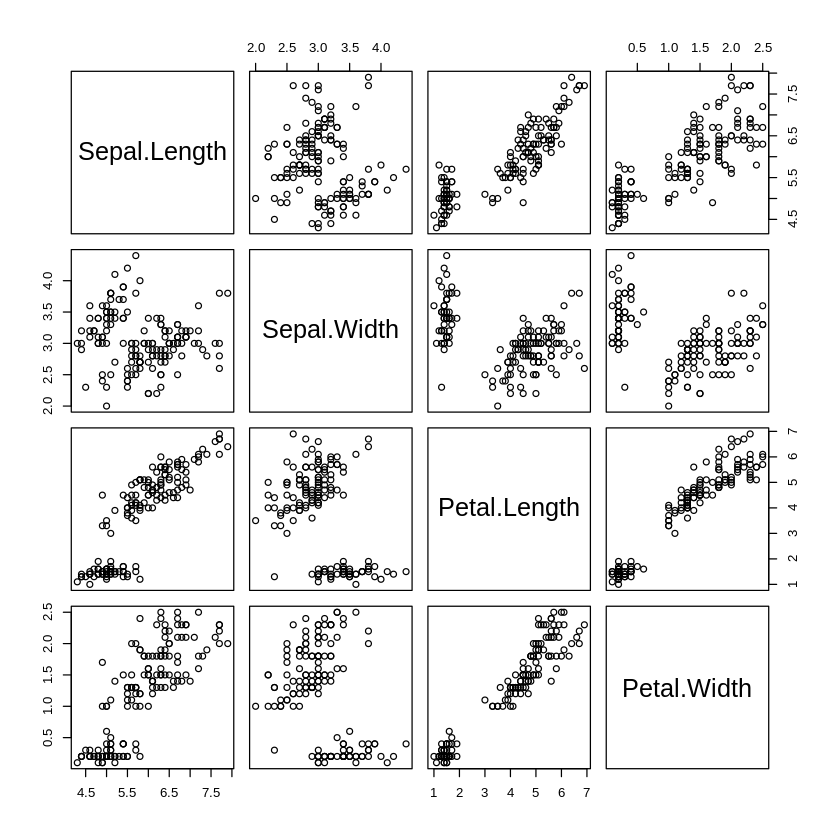

In [31]:
# Method 4. Equivalent to:
plot(df)

#### **Pairs plot including mean and median values of each group**

In [10]:
a <- matrix(rnorm(5000, 10, 1) + rgamma(5000, 1, 2), 100, 5) # Create a matrix of 5x10
var_mean <- apply(a, 2, mean)
var_median <- apply(a, 2, median)

Warning message in matrix(rnorm(5000, 10, 1) + rgamma(5000, 1, 2), 100, 5):
“data length differs from size of matrix: [5000 != 100 x 5]”


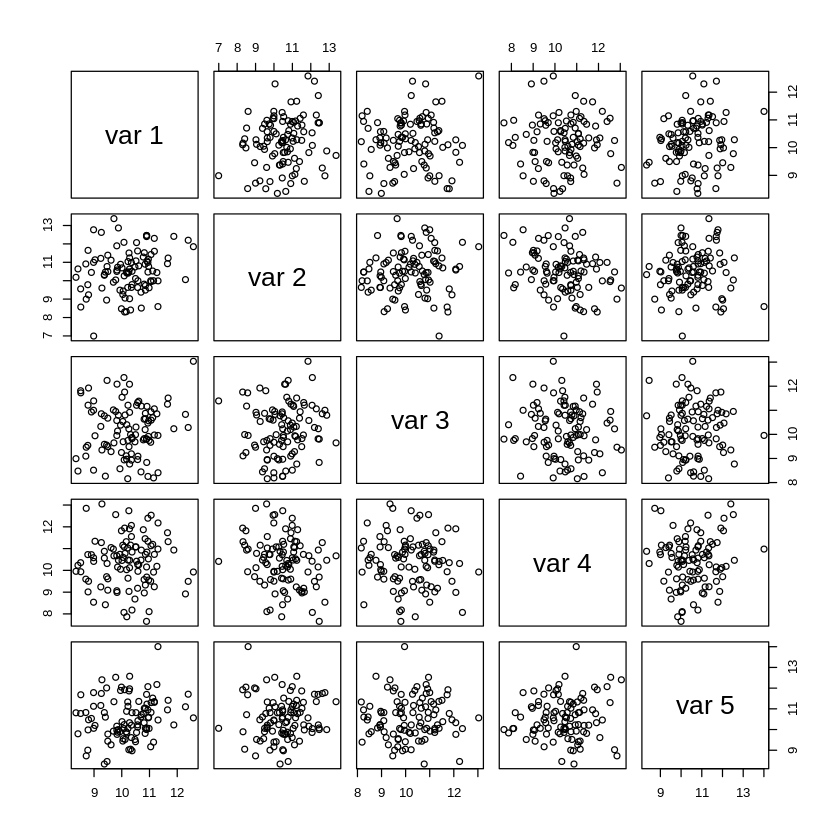

In [11]:
# Method 1
pairs(a)

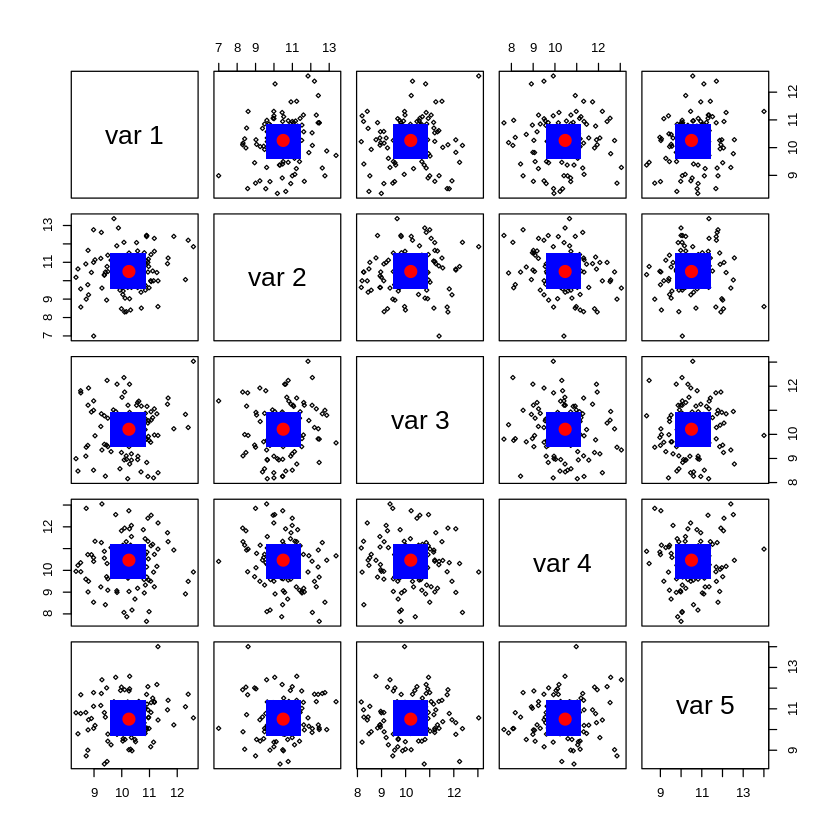

In [25]:
# Method 2. Including mean and median values
# Ref.: https://stackoverflow.com/questions/65947719/how-to-add-the-point-plot-for-the-scatterplot-using-pairs-function-in-r
da = rbind(a,var_mean,var_median)
pairs(da,col = c(rep("black",nrow(a)),"blue","red"),
      pch= c(rep(5,nrow(a)),15,19),    # Marker-type
      cex = c(rep(0.5,nrow(a)),6,2)    # Marker-size
)

#### **Pairs plot**
- Example 1
- Example 2
- Example 3
- Example 4
- Example 5

In [2]:
set.seed(525354)                       # Set seed for reproducibility
N <- 100                              # Sample size of 1000
x1 <- rnorm(N)                         # Create variable
x2 <- x1 + rnorm(N, 0, 3)              # Create correlated variable
x3 <- 2 * x1 - x2 + rnorm(N, 0, 2)     # Create another correlated variable
data <- data.frame(x1, x2, x3)         # Combine all variables to data.frame

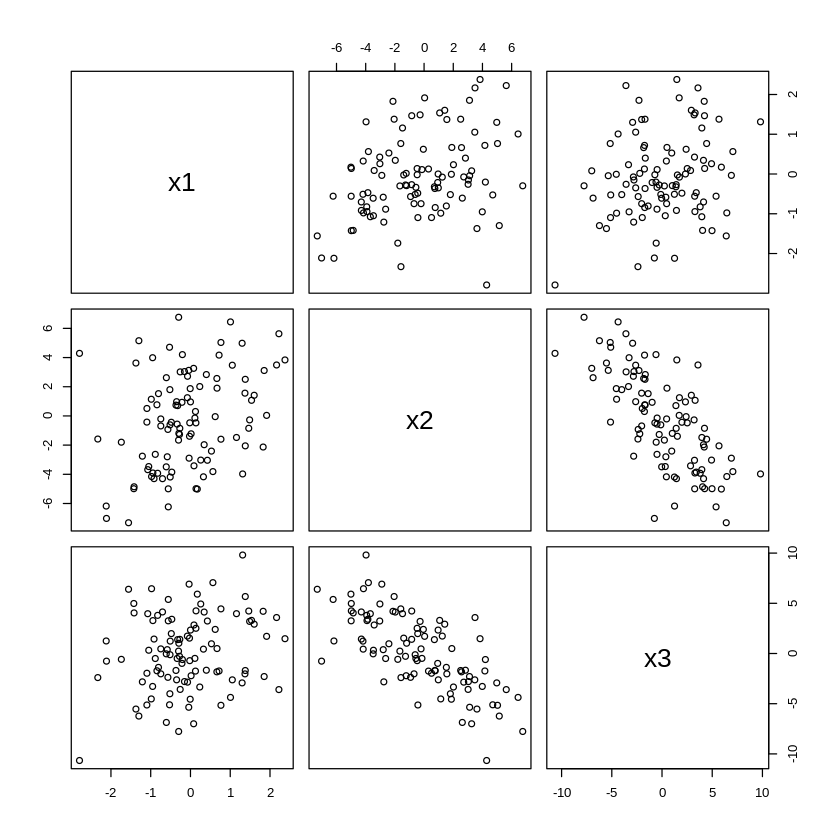

In [3]:
pairs(data)                            # Apply pairs function Example 1

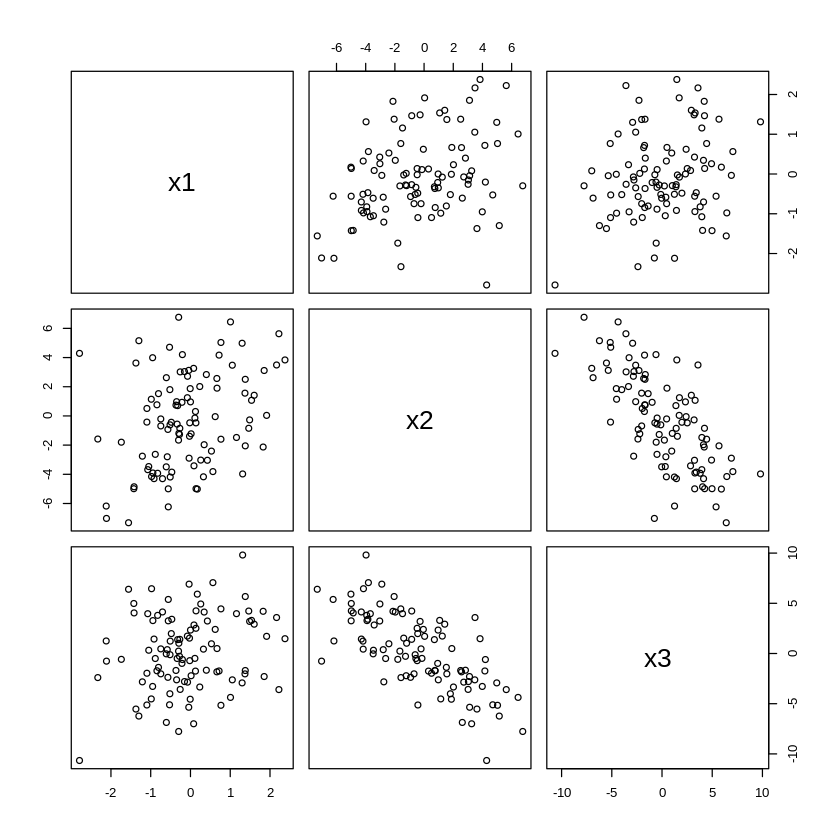

In [4]:
pairs(~ x1 + x2 + x3, data = data)     # Produces same plot as in Example 1

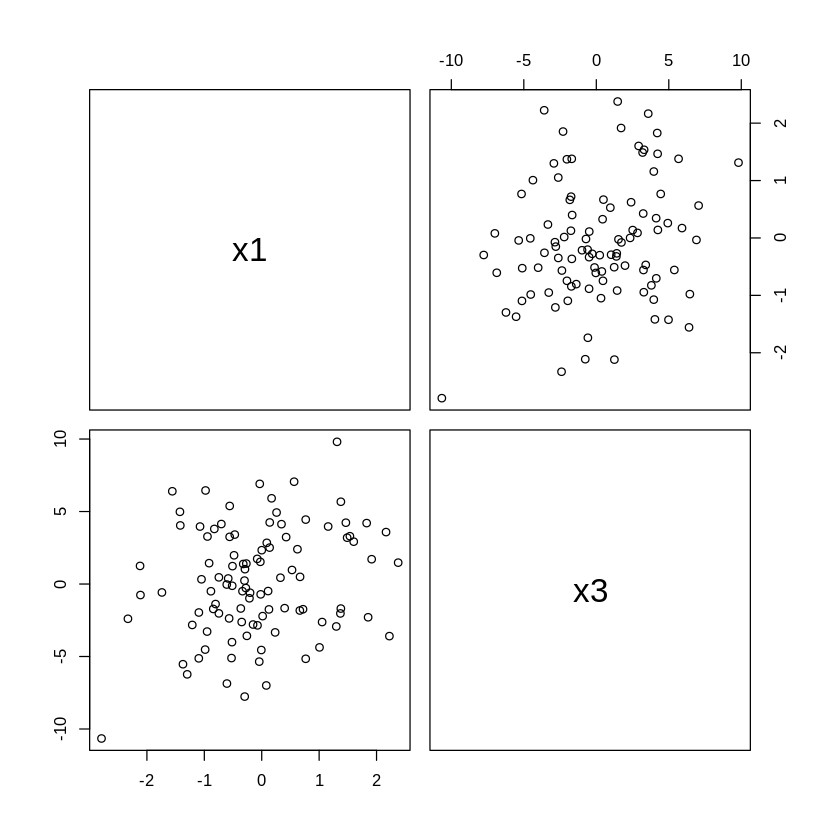

In [5]:
pairs(~ x1 + x3, data = data)          # Leave out one variable

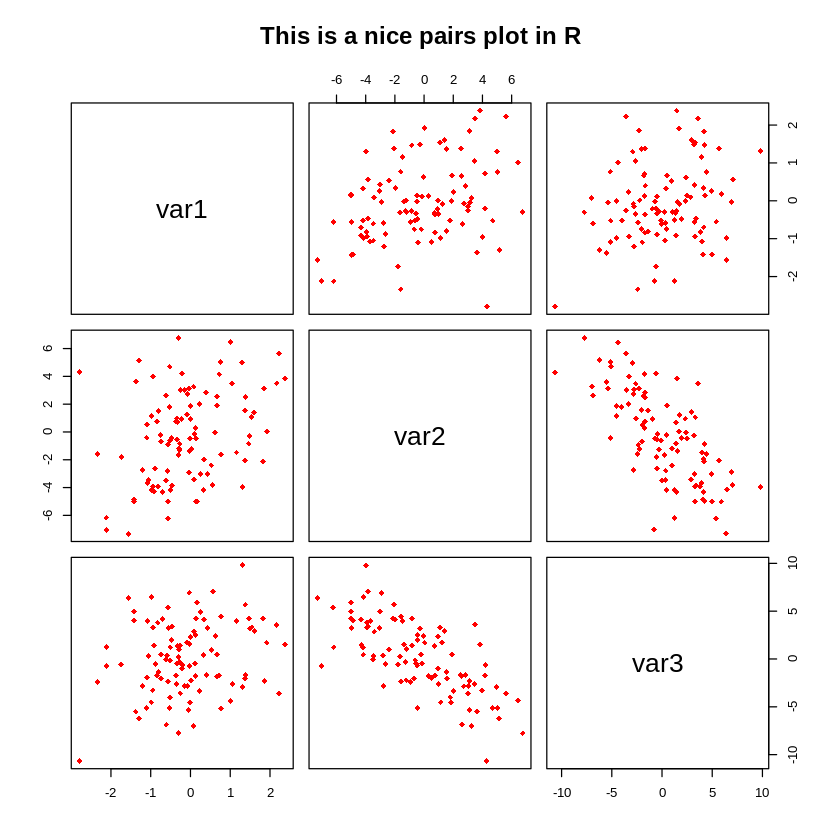

In [6]:
pairs(data[ , 1:3],
      col = "red",                                         # Change color
      pch = 18,                                            # Change shape of points
      labels = c("var1", "var2", "var3"),                  # Change labels of diagonal
      main = "This is a nice pairs plot in R")             # Add a main title

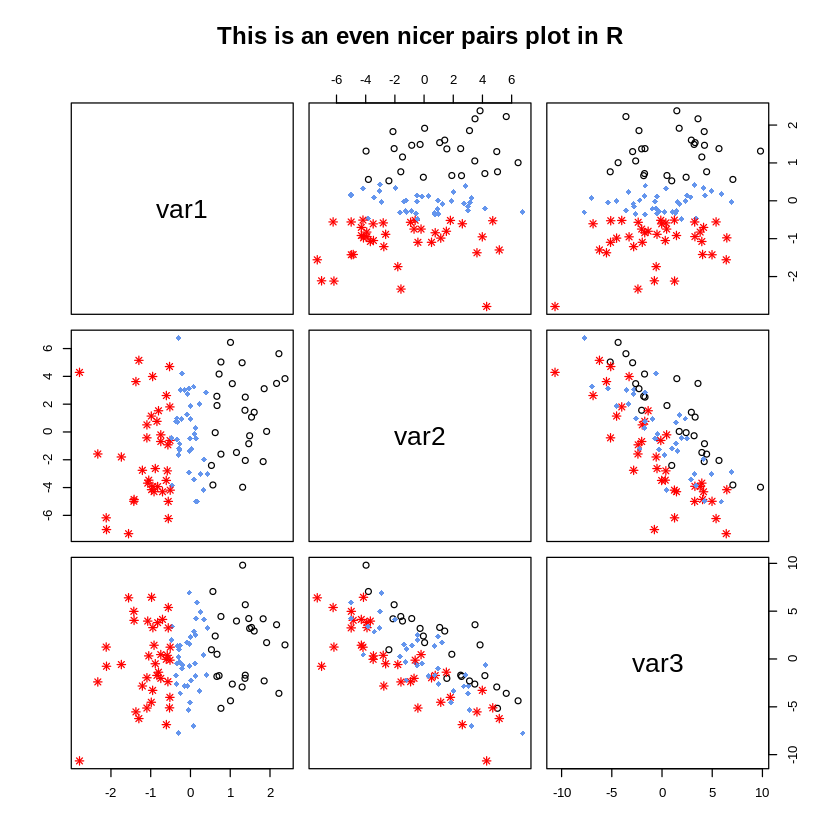

In [7]:
### Pairs plot making segmentation
group <- NA
group[data$x1 < - 0.5] <- 1
group[data$x1 >= - 0.5 & data$x1 <= 0.5] <- 2
group[data$x1 > 0.5] <- 3

pairs(data[ , 1:3],
      col = c("red", "cornflowerblue", "black")[group],   # Change color by group
      pch = c(8, 18, 1)[group],                            # Change points by group
      labels = c("var1", "var2", "var3"),                  # Change labels by group
      main = "This is an even nicer pairs plot in R")      # Set main title

#### **Pairs plot with custom colors with random dataset**

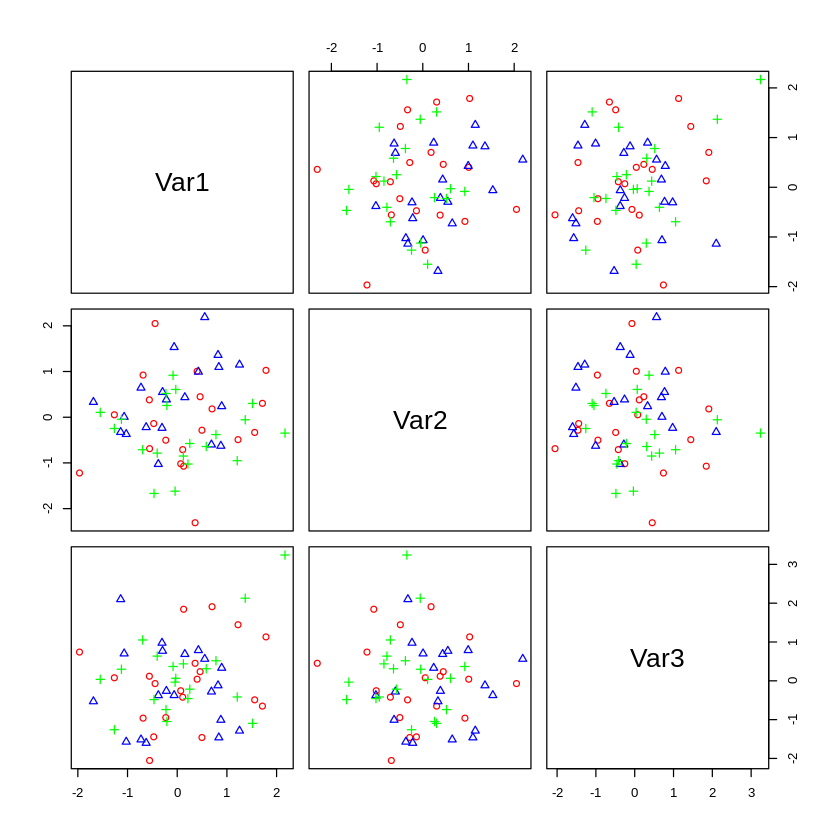

In [32]:
### Pair plot with custom colors with Random data
set.seed(123)
data <- data.frame(
  Class = rep(letters[1:3], each = 20),
  Var1 = rnorm(60),
  Var2 = rnorm(60),
  Var3 = rnorm(60)
)
# Define colors and markers for each class
colors <- c("a" = "red", "b" = "blue", "c" = "green")
markers <- c("a" = 1, "b" = 2, "c" = 3)
# Create a pair matrix plot with different colors and markers
pairs(data[, -1],
      col = colors[data$Class],
      pch = markers[data$Class])

#### **Pairs plot - Iris dataset**
Ref.: http://www.sthda.com/english/wiki/scatter-plot-matrices-r-base-graphs

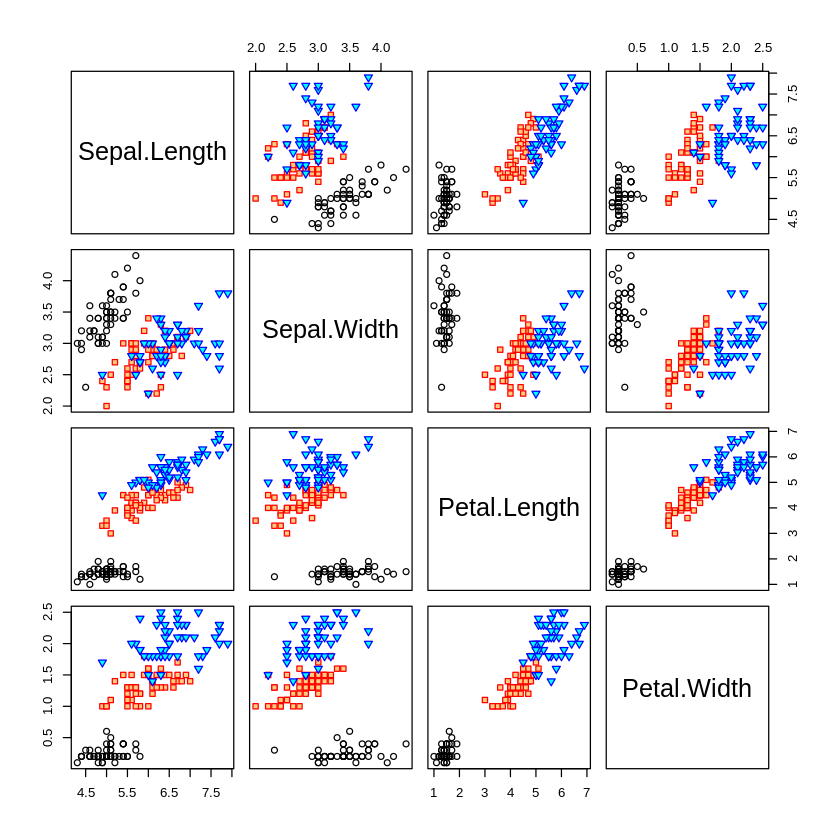

In [5]:
df <- iris[1:4] # Iris data
# Groups
species <- iris[, 5]

marker_palette <- c('versicolor'=1, 'virginica'=22, 'setosa'=25)
color_palette <- c("versicolor" = "black", "virginica" = "red", "setosa" = "blue") # marker-edge color
bg_palette <- c("versicolor" = "green", "virginica" = "#ffcc80", "setosa" = "cyan") # 'bg' works only on pch>20
pairs(df,
      #pch = 22,
      pch = marker_palette[species],   # type of marker
      col = color_palette[species],    # edge-marker color
      bg = bg_palette[species]         # backgroundmarker color. Only markers over pch>20 have option of setting bg-color
      )

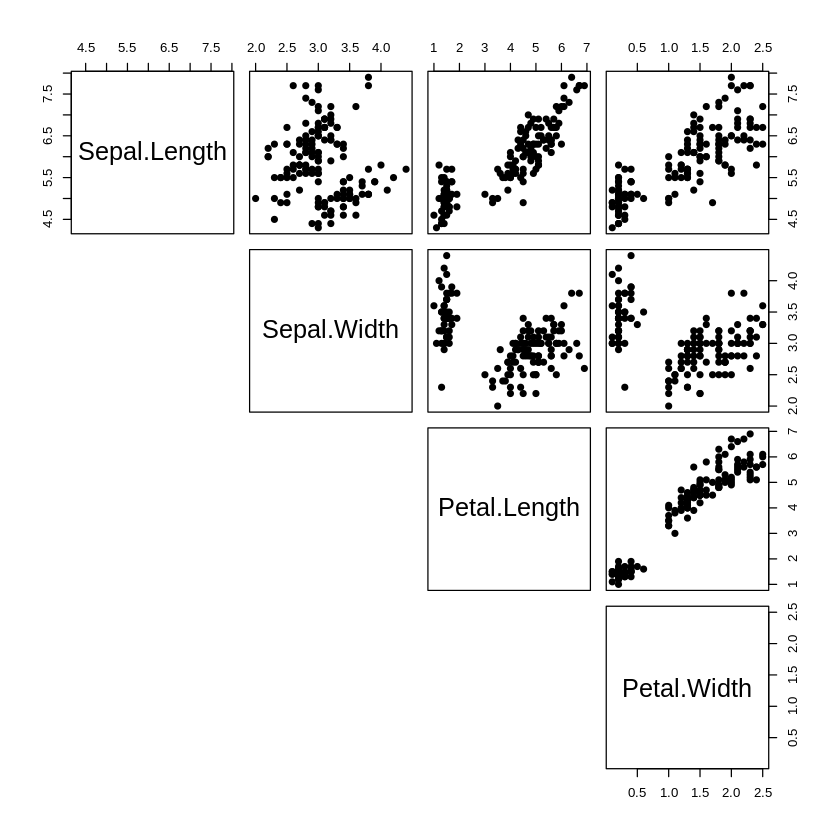

In [48]:
# lower panel NULL
pairs(iris[,1:4], pch = 19, lower.panel = NULL)

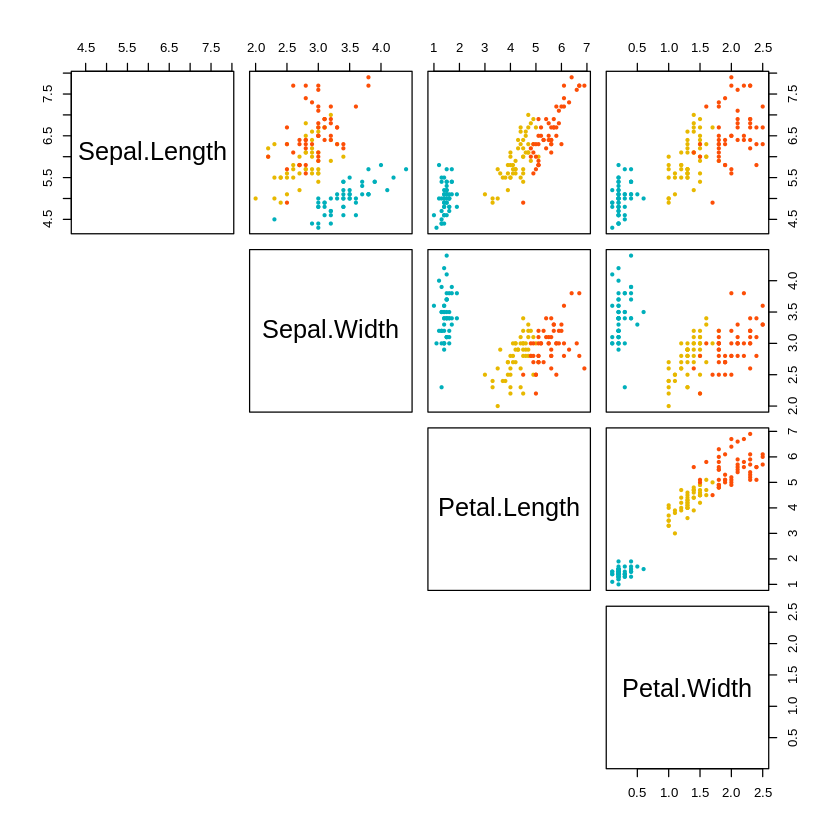

In [49]:
my_cols <- c("#00AFBB", "#E7B800", "#FC4E07")
pairs(iris[,1:4], pch = 19,  cex = 0.5,
      col = my_cols[iris$Species],
      lower.panel=NULL)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


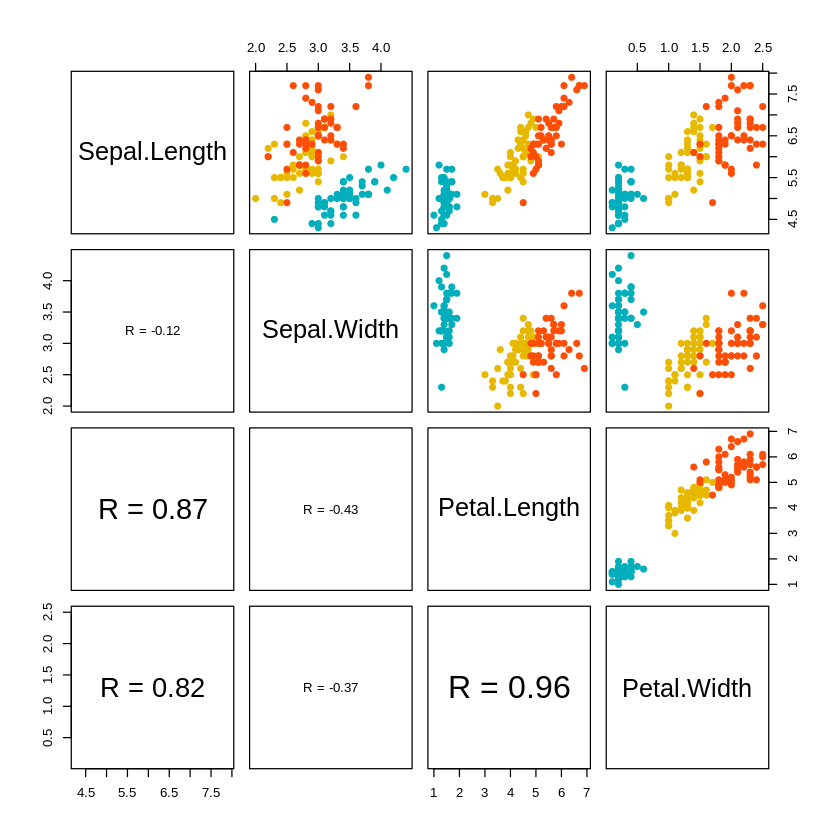

In [50]:
# Correlation panel
panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cor(x, y), digits=2)
    txt <- paste0("R = ", r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
}
# Customize upper panel
upper.panel<-function(x, y){
  points(x,y, pch = 19, col = my_cols[iris$Species])
}
# Create the plots
pairs(iris[,1:4],
      lower.panel = panel.cor,
      upper.panel = upper.panel)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


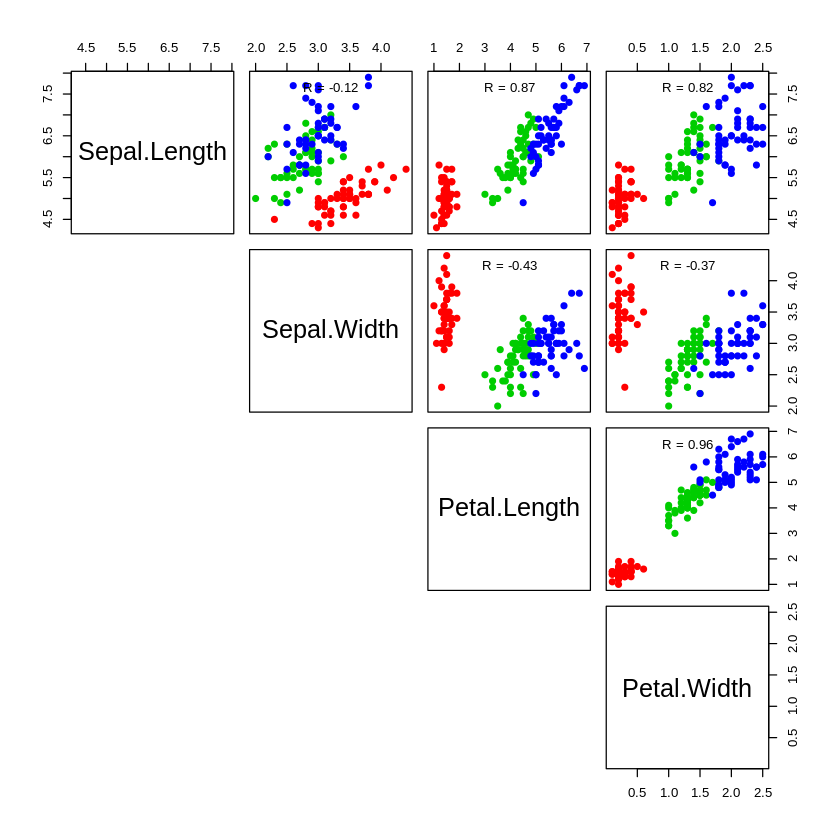

In [51]:
# Customize upper panel
upper.panel<-function(x, y){
  points(x,y, pch=19, col=c("red", "green3", "blue")[iris$Species])
  r <- round(cor(x, y), digits=2)
  txt <- paste0("R = ", r)
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  text(0.5, 0.9, txt)
}
pairs(iris[,1:4], lower.panel = NULL,
      upper.panel = upper.panel)

In [ ]:
install.packages("psych")
library(psych)

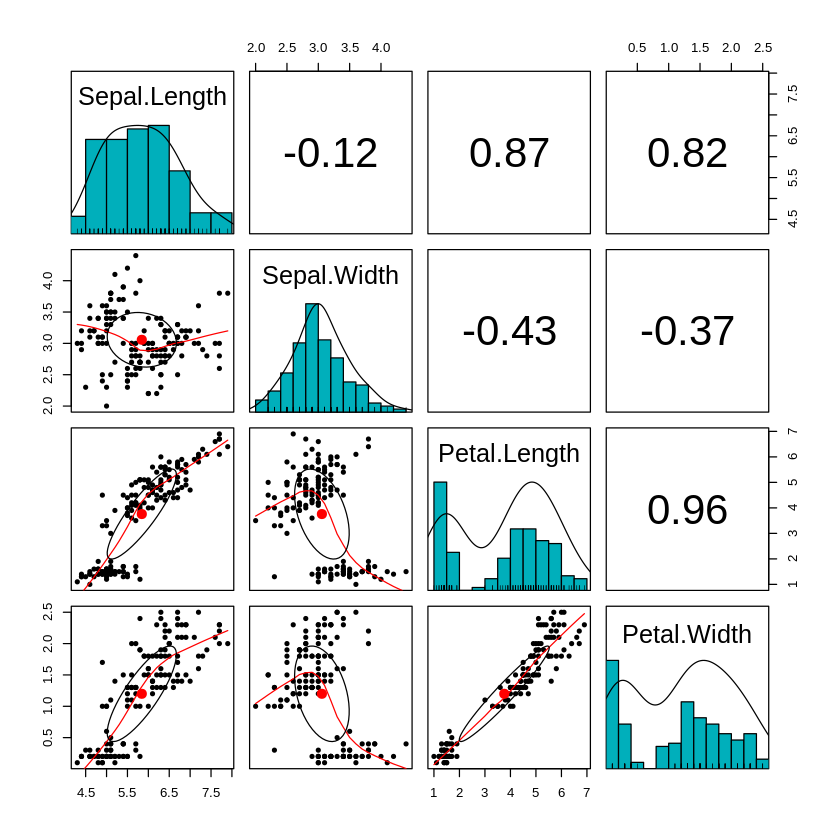

In [55]:
pairs.panels(iris[,-5],
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
             )

#### **Pairs plot for GAP analysis (Master OSU Thesis)**

In [35]:
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’




In [ ]:
install.packages("Hmisc")
install.packages("psych")
install.packages("car")
library(Hmisc)
library(psych)
library(car)

In [39]:
url='https://raw.githubusercontent.com/noayarae/plot_templates/main/wetland_optimization.csv'   # Ref.: https://www.youtube.com/watch?v=iYx57oa8jT4
data <- read.csv(url) # Read CSV
#data <- read.csv("G:/work/CHIN/research/plots/plots_in_R/tradeoff1.csv")
#data <- read.csv("D:/thesis/plots/tradeoff1.csv") # Read CSV dataset and assign to "data"
#data <- read.csv("E:/osu_account_google_drive/invest/Paper/Paper_1/matrix_plots/tradeoff1.csv") # Read CSV dataset and assign to "data"
head(data)

,wet_area,peak_flow_red,sed_red,nit_red,habitat_id,model
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,861.2,187.2,10.69,13.04,298952,run1-noGAP
2,793.1,186.5,10.70,12.96,300824,run1-noGAP
3,851.1,186.5,10.69,13.03,302398,run1-noGAP
4,988.4,186.2,10.68,13.11,308497,run1-noGAP
5,968.5,186.0,10.69,13.10,302246,run1-noGAP
6,904.4,185.6,10.69,13.04,301790,run1-noGAP


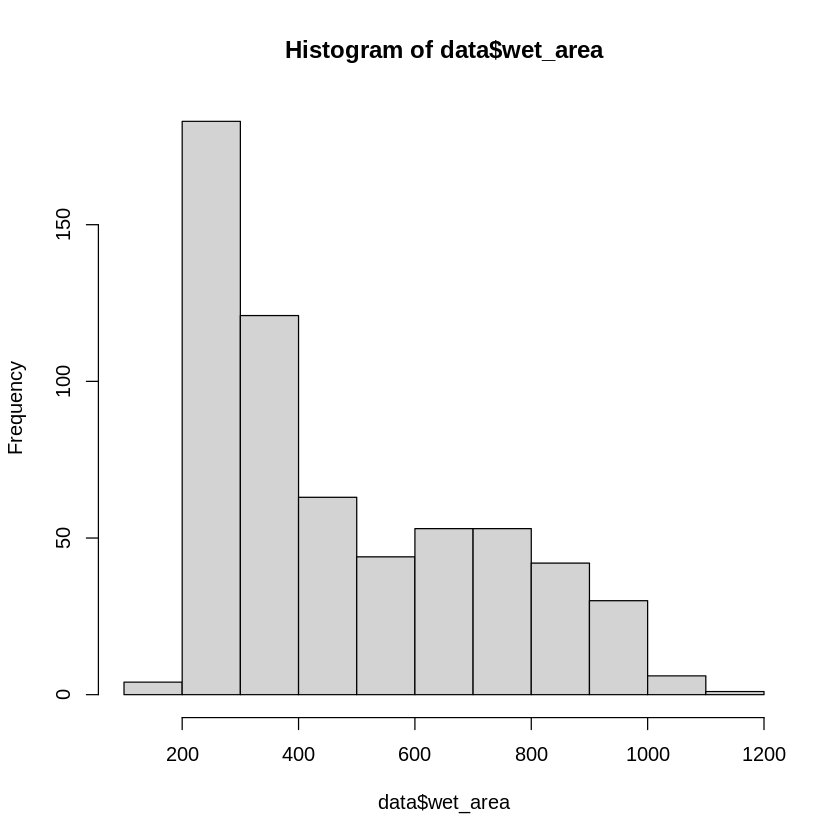

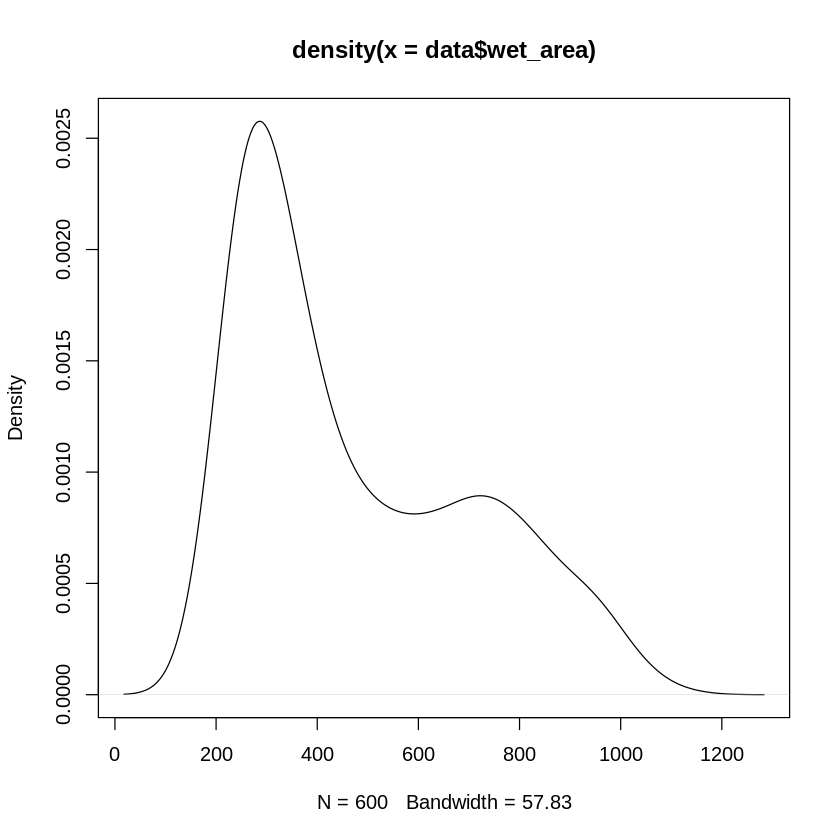

In [42]:
hist(data$wet_area)
plot(density(data$wet_area))

In [43]:
a2 = data[, c(1:5)]
g_runs = data[, 6]
unique(g_runs)

cor(a2)

[1] "run1-noGAP" "run1-wGAP"  "run2-noGAP" "run2-wGAP"  "run3-noGAP"
[6] "run3-wGAP"

,wet_area,peak_flow_red,sed_red,nit_red,habitat_id
wet_area,1.0000000,0.9060816,0.83382060,0.807999753,0.017842800
peak_flow_red,0.9060816,1.0000000,0.90122588,0.904133646,-0.035434998
sed_red,0.8338206,0.9012259,1.00000000,0.925184441,0.013810786
nit_red,0.8079998,0.9041336,0.92518444,1.000000000,-0.006889082
habitat_id,0.0178428,-0.0354350,0.01381079,-0.006889082,1.000000000


[1] "run1-noGAP" "run1-wGAP"  "run2-noGAP" "run2-wGAP"  "run3-noGAP"
[6] "run3-wGAP"

,wet_area,peak_flow_red,sed_red,nit_red,habitat_id
wet_area,1.0000000,0.9060816,0.83382060,0.807999753,0.017842800
peak_flow_red,0.9060816,1.0000000,0.90122588,0.904133646,-0.035434998
sed_red,0.8338206,0.9012259,1.00000000,0.925184441,0.013810786
nit_red,0.8079998,0.9041336,0.92518444,1.000000000,-0.006889082
habitat_id,0.0178428,-0.0354350,0.01381079,-0.006889082,1.000000000


Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


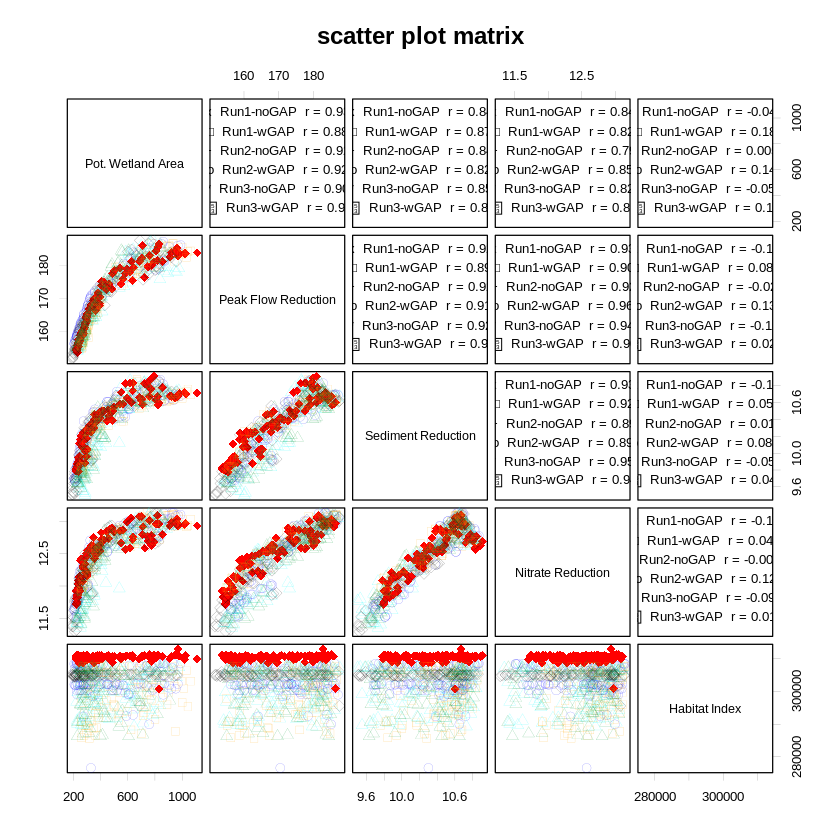

In [47]:
a2 = data[, c(1:5)]
g_runs = data[, 6]
unique(g_runs)

cor(a2) # Correlation matrix

#panel.pearson <- function(x,y,...){
#  horizontal <- (par("usr")[1]+par("usr")[2])/2;
#  vertical <- (par("usr")[3]+par("usr")[4])/2;
#  text(horizontal, vertical, format(abs(cor(x,y)),digits = 2))
#}
#pairs(a2, main="scatter plot matrix", pch=21, bg=c("red","green","blue")[unclass(data$case)],
#      upper.panel = panel.pearson, labels = c("Pot-Wet","PFR","HI"))

#It builds a function called "panel.pearson" (line 26-127)
panel.pearson <- function(x,y,digits=2,cex.cor,...){
  usr <- par("usr");on.exit(par(usr))
  par(usr=c(0,1,0,1))

  ####### Filter "run1-noGAP" data
  z = data[,c(6)]
  xyz <- data.frame(x,y,z) # put together x,y,z in one table
  xx <- which(xyz$z =="run1-noGAP") # filtering data
  yy <- xyz[xx,]
  x1 <- yy[1]
  y1 <- yy[2]
  #print(yy)
  #correlation coeff for "run1-noGAP" data
  r1 <- cor(x1,y1)
  #print (r1)
  txt <- format(c(r1, 0.123456789), digits = digits)[1]
  txt <- paste(intToUtf8(120),"  Run1-noGAP  r = ",txt,sep = "")
  text(0.5, 0.9, txt) #position of text

  # Filter run1-wGAP data
  xyz <- data.frame(x,y,z) # put together x,y,z in one table
  xx <- which(xyz$z =="run1-wGAP") # filtering data
  yy <- xyz[xx,]
  x2 <- yy[1]
  y2 <- yy[2]
  #print(yy)
  #correlation coeff for "run1-wGAP" data
  r2 <- cor(x2,y2)
  #print (r2)
  txt <- format(c(r2, 0.123456789), digits = digits)[1]
  txt <- paste(intToUtf8(9633),"  Run1-wGAP  r = ",txt,sep = "")
  text(0.5, 0.75, txt) #position of text

  ####### Filter run2-noGAP data
  z = data[,c(6)]
  xyz <- data.frame(x,y,z) # put together x,y,z in one table
  xx <- which(xyz$z =="run2-noGAP") # filtering data
  yy <- xyz[xx,]
  x3 <- yy[1]
  y3 <- yy[2]
  #print(yy)
  #correlation coeff for "run2-noGAP" data
  r3 <- cor(x3,y3)
  #print (r3)
  txt <- format(c(r3, 0.123456789), digits = digits)[1]
  txt <- paste(intToUtf8(43),"  Run2-noGAP  r = ",txt,sep = "")
  text(0.5, 0.6, txt) #position of text

  # Filter run2-wGAP data
  xyz <- data.frame(x,y,z) # put together x,y,z in one table
  xx <- which(xyz$z =="run2-wGAP") # filtering data
  yy <- xyz[xx,]
  x4 <- yy[1]
  y4 <- yy[2]
  #print(yy)
  #correlation coeff for "run2-wGAP" data
  r4 <- cor(x4,y4)
  #print (r4)
  txt <- format(c(r4, 0.123456789), digits = digits)[1]
  txt <- paste(intToUtf8(111),"  Run2-wGAP  r = ",txt,sep = "")
  text(0.5, 0.45, txt) #position of text

  ####### Filter run3-noGAP data
  z = data[,c(6)]
  xyz <- data.frame(x,y,z) # put together x,y,z in one table
  xx <- which(xyz$z =="run3-noGAP") # filtering data
  yy <- xyz[xx,]
  x5 <- yy[1]
  y5 <- yy[2]
  #print(yy)
  #correlation coeff for "run3-noGAP" data
  r5 <- cor(x5,y5)
  #print (r5)
  txt <- format(c(r5, 0.123456789), digits = digits)[1]
  txt <- paste(intToUtf8(42),"  Run3-noGAP  r = ",txt,sep = "")
  text(0.5, 0.3, txt) #position of text

  # Filter run3-wGAP data
  xyz <- data.frame(x,y,z) # put together x,y,z in one table
  xx <- which(xyz$z =="run3-wGAP") # filtering data
  yy <- xyz[xx,]
  x6 <- yy[1]
  y6 <- yy[2]
  #print(yy)
  #correlation coeff for "run3-wGAP" data
  r6 <- cor(x6,y6)
  #print (r6)
  txt <- format(c(r6, 0.123456789), digits = digits)[1]
  txt <- paste(intToUtf8(9651),"  Run3-wGAP  r = ",txt,sep = "")
  text(0.5, 0.15, txt) #position of text

  ########## p-value calculaion
  ### p <- cor.test(x,y)$p.value
  ### #pt <- c(0.20,0.6,0.01,0.11,0.009,0.098,0.036,0.162, 0.119,0.04)
  ### #p <- t(pt)
  ### #print (p)
  ### txt2 <- format(c(p, 0.123456789), digits = digits)[1]
  ### txt2 <- paste("p=",txt2,sep = "")
  ### if(p<0.01) txt2 <- paste("p=","<0.01",sep = "")
  ### text(0.5, 0.4, txt2) #position of text
}

marker_set <- c("run1-noGAP"=1, "run1-wGAP"=2,  "run2-noGAP"=18, "run2-wGAP"=22,  "run3-noGAP"=23, "run3-wGAP"=24)
color_set <- c("run1-noGAP"='blue', "run1-wGAP"='cyan',  "run2-noGAP"='red', "run2-wGAP"='orange',  "run3-noGAP"='black', "run3-wGAP"='#009933')
pairs(a2,
      main="scatter plot matrix",
      #pch=c(4,4,3,1,8,2)[unclass(data$case)],
      pch = marker_set[g_runs],
      col = color_set[g_runs],
      #bg=c("black","red","green3","blue","magenta","cyan")[unclass(data$case)],
      upper.panel = panel.pearson,
      gap=0.5,                      # Space between plot boundaries
      cex=1.5,
      lwd = 0.1,
      labels = c("Pot. Wetland Area", "Peak Flow Reduction", "Sediment Reduction","Nitrate Reduction","Habitat Index")
      )

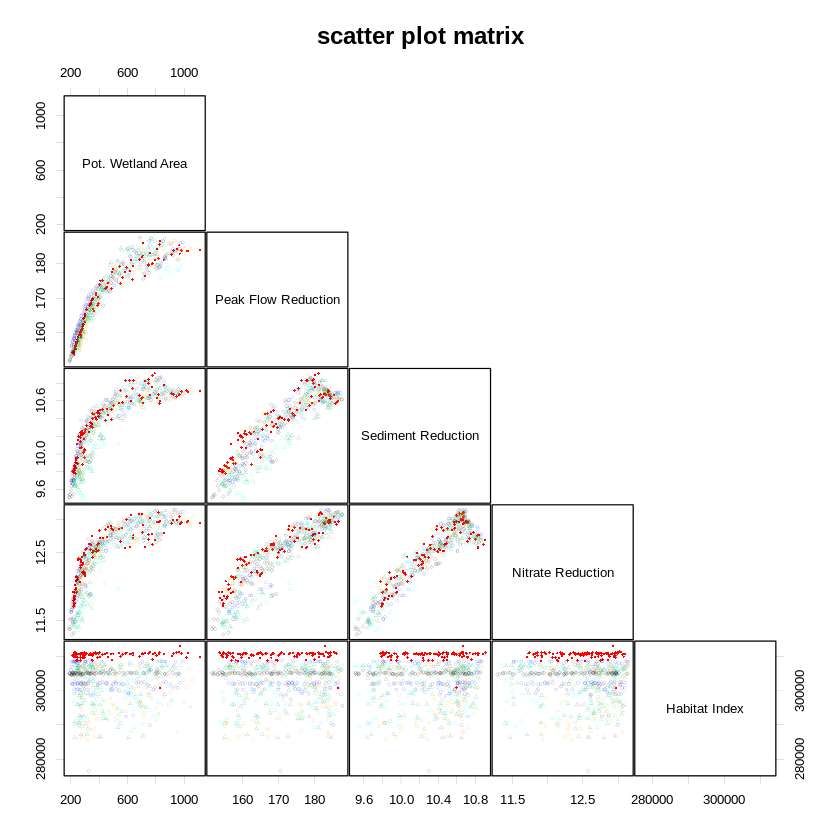

In [45]:
pairs(a2,
      main="scatter plot matrix",
      #pch=c(4,0,3,1,8,2)[unclass(data$case)],
      pch = marker_set[g_runs],
      col = color_set[g_runs],
      #bg=c("black","red","green3","blue","magenta","cyan")[unclass(data$case)],
      upper.panel = NULL,
      gap=0.1,
      cex=0.5,
      lwd = 0.1,
      labels = c("Pot. Wetland Area", "Peak Flow Reduction", "Sediment Reduction","Nitrate Reduction","Habitat Index")
      )

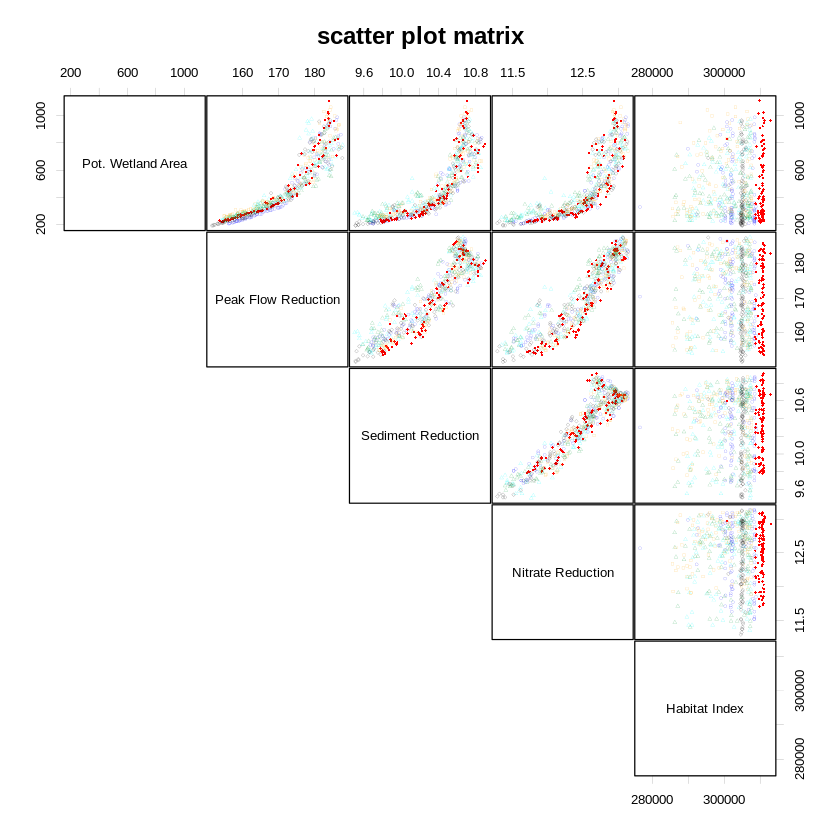

In [46]:
pairs(a2,
      main="scatter plot matrix",
      #pch=c(4,0,3,1,8,2)[unclass(data$case)],
      pch = marker_set[g_runs],
      col = color_set[g_runs],
      #bg=c("black","red","green3","blue","magenta","cyan")[unclass(data$case)],
      lower.panel = NULL,
      gap=0.1,
      cex=0.5,
      lwd = 0.1,
      labels = c("Pot. Wetland Area", "Peak Flow Reduction", "Sediment Reduction","Nitrate Reduction","Habitat Index")
      )